In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
driver1=pd.read_csv("driver1_info.csv",encoding="utf-8")
# print(driver1.head())

In [3]:
print(driver1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55318 entries, 0 to 55317
Data columns (total 36 columns):
driver1fault             55318 non-null int64
driver1responsibility    55318 non-null int64
sex1                     55318 non-null int64
carcolor1                55317 non-null float64
clpp1                    55318 non-null int64
jxmc1                    55318 non-null int64
accident_month           55318 non-null int64
accident_quarter         55318 non-null int64
accident_weekday         55318 non-null int64
accident_day             55318 non-null int64
accident_hour            55318 non-null int64
accident_minute          55318 non-null int64
is_province1             55318 non-null int64
is_city1                 55318 non-null int64
is_driver1_city          55318 non-null int64
is_driver1_province      55318 non-null int64
driver1_days             44498 non-null float64
driver1_years            55318 non-null int64
driver1_age              54267 non-null float64
temperature

In [4]:
driver1["temperature"]=(driver1["temperature_max"]+
                        driver1["temperature_min"])/2
# print(driver1["temperature"])

In [5]:
driver1=driver1.drop(["driver1_days","maxtime_x","temperature_max","temperature_min",
                      "driver1_age","accident_quarter","driver1_years","difftime_x"],axis=1)
print(driver1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55318 entries, 0 to 55317
Data columns (total 29 columns):
driver1fault             55318 non-null int64
driver1responsibility    55318 non-null int64
sex1                     55318 non-null int64
carcolor1                55317 non-null float64
clpp1                    55318 non-null int64
jxmc1                    55318 non-null int64
accident_month           55318 non-null int64
accident_weekday         55318 non-null int64
accident_day             55318 non-null int64
accident_hour            55318 non-null int64
accident_minute          55318 non-null int64
is_province1             55318 non-null int64
is_city1                 55318 non-null int64
is_driver1_city          55318 non-null int64
is_driver1_province      55318 non-null int64
weather1                 55318 non-null int64
weather2                 55318 non-null int64
wind1                    55318 non-null int64
wind2                    55318 non-null int64
district       

In [7]:
driver1["fine_x"]=driver1["fine_x"].fillna(0)
driver1["score_x"]=driver1["score_x"].fillna(0)
driver1["wfxw_x"]=driver1["wfxw_x"].fillna(0)
driver1["xfcount_x"]=driver1["xfcount_x"].fillna(0)

In [8]:
district_count=driver1["district"].isnull().sum()
district_list=np.random.randint(0,5,district_count)*1.0
driver1["district"][np.isnan(driver1["district"])]=district_list

E:\Anaconda\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [9]:
driver1["carcolor1"]=driver1["carcolor1"].fillna(0)

In [10]:
print(driver1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55318 entries, 0 to 55317
Data columns (total 29 columns):
driver1fault             55318 non-null int64
driver1responsibility    55318 non-null int64
sex1                     55318 non-null int64
carcolor1                55318 non-null float64
clpp1                    55318 non-null int64
jxmc1                    55318 non-null int64
accident_month           55318 non-null int64
accident_weekday         55318 non-null int64
accident_day             55318 non-null int64
accident_hour            55318 non-null int64
accident_minute          55318 non-null int64
is_province1             55318 non-null int64
is_city1                 55318 non-null int64
is_driver1_city          55318 non-null int64
is_driver1_province      55318 non-null int64
weather1                 55318 non-null int64
weather2                 55318 non-null int64
wind1                    55318 non-null int64
wind2                    55318 non-null int64
district       

In [11]:
from sklearn import preprocessing
driver1["lng"]=preprocessing.MinMaxScaler().fit_transform(driver1["lng"])
driver1["lat"]=preprocessing.MinMaxScaler().fit_transform(driver1["lat"])
print(driver1["lng"].head())
print(driver1["lat"].head())

0    0.436501
1    0.439842
2    0.439074
3    0.437462
4    0.439019
Name: lng, dtype: float64
0    0.208014
1    0.205489
2    0.203365
3    0.204914
4    0.202493
Name: lat, dtype: float64


E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains

In [12]:
prediction=[x for x in driver1.columns if x not in 
            ["driver1fault","driver1responsibility"]]

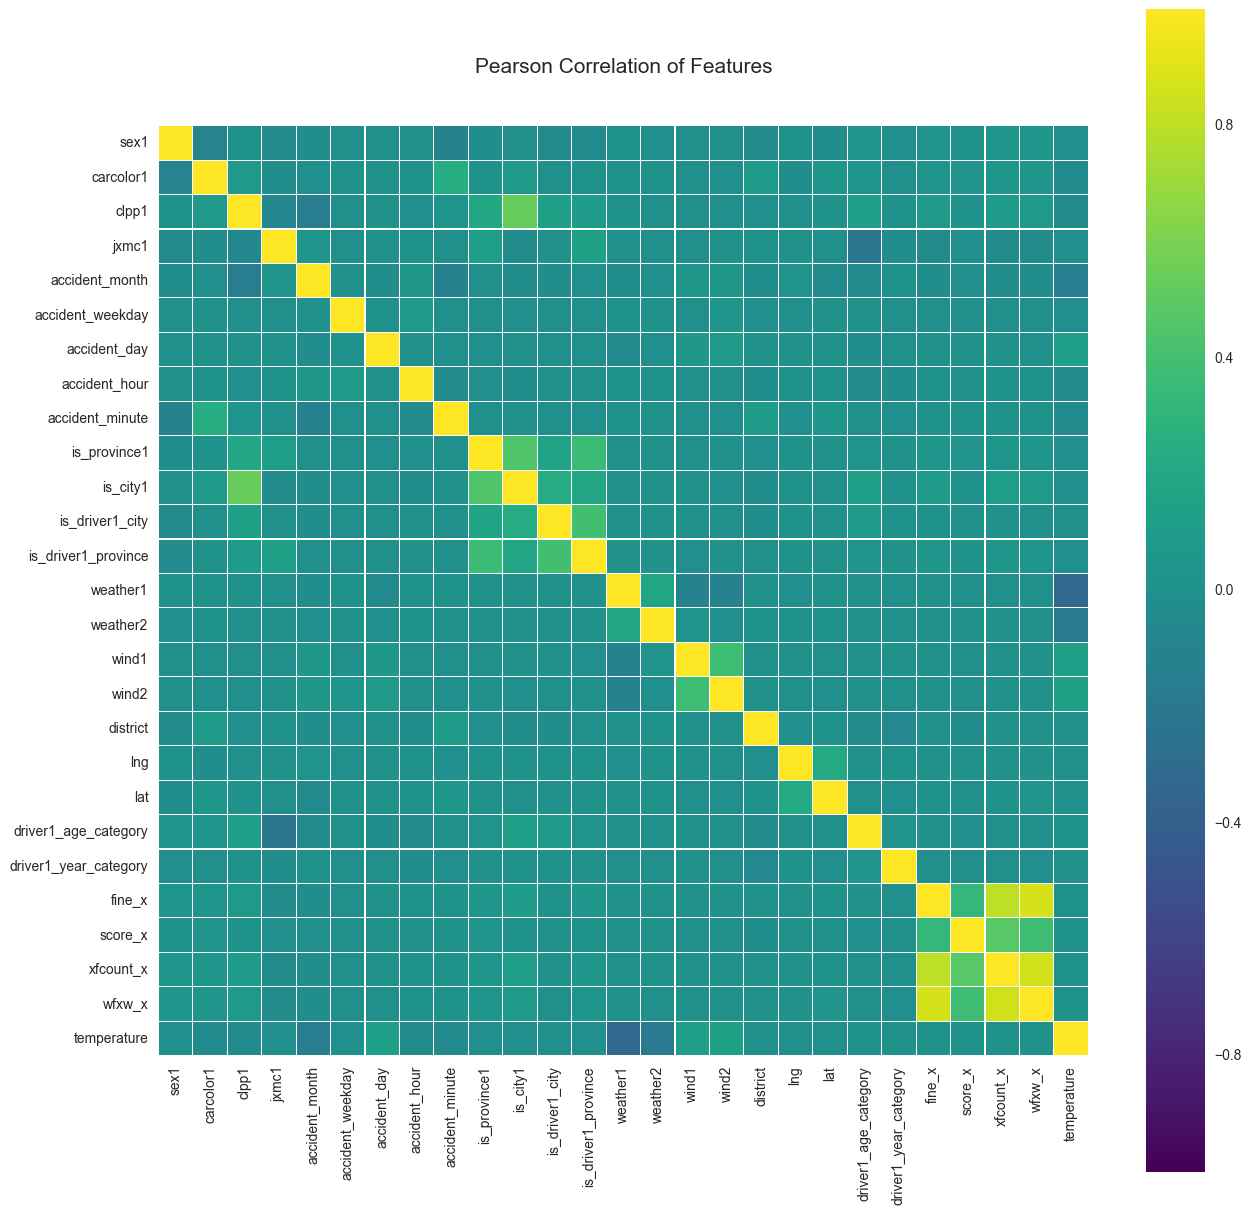

In [15]:
colormap=plt.cm.viridis
fig=plt.figure(figsize=(15,15))
plt.title("Pearson Correlation of Features",y=1.05,size=15)
sns.heatmap(driver1[prediction].astype(float).corr(),linewidths=0.1,vmax=1,
            square=True,cmap=colormap,linecolor="white",annot=False) 
# vmax,vmin 将cmap最大最小的颜色标记给 指定的值
#square 显示是否为正方形， annot 是否显示值
plt.show()
fig.savefig("driver1_feature_pearson.png",piexl=2000)

In [16]:
def onehot(df,column_name):
    
    dummies=pd.get_dummies(df[column_name],prefix="_" + column_name)
    df=df.join(dummies)
    df=df.drop(column_name,axis=1)
    return df

In [17]:
def standscalar(df,column_name):
    
    df[column_name]=np.log1p(df[column_name])
    return df

In [19]:
onehot_driver=driver1
onehot_driver=onehot(onehot_driver,"carcolor1")
onehot_driver=onehot(onehot_driver,"clpp1")
onehot_driver=onehot(onehot_driver,"jxmc1")
onehot_driver=onehot(onehot_driver,"weather1")
onehot_driver=onehot(onehot_driver,"weather2")
onehot_driver=onehot(onehot_driver,"wind1")
onehot_driver=onehot(onehot_driver,"wind2")
onehot_driver=onehot(onehot_driver,"driver1_age_category")
onehot_driver=onehot(onehot_driver,"driver1_year_category")
onehot_driver=onehot(onehot_driver,"district")
onehot_driver=onehot(onehot_driver,"accident_month")
onehot_driver=onehot(onehot_driver,"accident_weekday")
# onehot_driver=onehot(onehot_driver,"accident_day")

In [20]:
onehot_driver=standscalar(onehot_driver,"fine_x")
onehot_driver=standscalar(onehot_driver,"score_x")
onehot_driver=standscalar(onehot_driver,"xfcount_x")
onehot_driver=standscalar(onehot_driver,"wfxw_x")
# onehot_driver=standscalar(onehot_driver,"difftime_x")
onehot_driver=standscalar(onehot_driver,"accident_day")
onehot_driver=standscalar(onehot_driver,"accident_hour")
onehot_driver=standscalar(onehot_driver,"accident_minute")
onehot_driver["temperature"]=preprocessing.StandardScaler().fit_transform(onehot_driver["temperature"])

E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)


In [21]:
print(onehot_driver.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55318 entries, 0 to 55317
Data columns (total 94 columns):
driver1fault                55318 non-null int64
driver1responsibility       55318 non-null int64
sex1                        55318 non-null int64
accident_day                55318 non-null float64
accident_hour               55318 non-null float64
accident_minute             55318 non-null float64
is_province1                55318 non-null int64
is_city1                    55318 non-null int64
is_driver1_city             55318 non-null int64
is_driver1_province         55318 non-null int64
lng                         55318 non-null float64
lat                         55318 non-null float64
fine_x                      55318 non-null float64
score_x                     55318 non-null float64
xfcount_x                   55318 non-null float64
wfxw_x                      55318 non-null float64
temperature                 55318 non-null float64
_carcolor1_0.0              55318 non-

In [22]:
# fig = plt.figure(figsize=(15, 15))
# g = sns.pairplot(driver1[[u'driver1fault', u'accident_month', u'accident_hour'
#     , u'weather1', u'wind1', u'temperature',u'accident_weekday', u'carcolor1']], 
#     hue="driver1fault",palette="Set1", plot_kws=dict(s=10),
#                  size=1.2, diag_kind='kde', diag_kws=dict(shade=True))
# 
# g.set(xticklabels=[])
# plt.show()
# fig.savefig("driver1_pairplot.png")

In [23]:
driver11=driver1[(driver1["driver1fault"]==7) | (driver1["driver1fault"]==1) | (driver1["driver1fault"]==3) | 
                 (driver1["driver1fault"]==8) | (driver1["driver1fault"]==9)] 
print(driver11["driver1fault"].value_counts())

7    21948
1    16568
8     7520
3     5104
9     2912
Name: driver1fault, dtype: int64


In [24]:
X=onehot_driver
y=X["driver1fault"].ravel()
X=X.drop("driver1fault",axis=1)
X=X.drop("driver1responsibility",axis=1)
X=X.values
X=X.astype(float)

In [25]:
X=driver1
y=X["driver1fault"].ravel()
X=X.drop("driver1fault",axis=1)
X=X.drop("driver1responsibility",axis=1)
X=X.values
X=X.astype(float)

In [41]:
X=driver11
y=X["driver1fault"].ravel()
X=X.drop("driver1fault",axis=1)
X=X.drop("driver1responsibility",axis=1)
X=X.values
X=X.astype(float)

In [26]:
print(X.shape)

(55318, 27)


In [20]:
# from sklearn.cross_validation import KFold
# 
# SEED = 0
# NFOLDS = 10 
# kf = KFold(X.shape[0],n_folds=NFOLDS,random_state=SEED)
# class SklearnHelper(object):
#     def __init__(self,clf,seed=0,params=None):
#         params["random_state"]=seed
#         self.clf=clf(**params)
#         
#     def train(self,x_train,y_train):
#         self.clf.fit(x_train,y_train)
#     
#     def predict(self,x):
#         return self.clf.predict(x)
#     
#     def fit(self,x,y):
#         return  self.clf.fit(x,y)
#     
#     def feature_importances(self,x,y):
#         print(self.clf.fit(x,y).feature_importances_)

In [27]:
from skfeature.function.similarity_based import reliefF 
from skfeature.function.statistical_based import chi_square
from skfeature.function.statistical_based import f_score 
from skfeature.function.sparse_learning_based import ll_l21
from skfeature.utility.sparse_learning import *
# from skfeature.function.similarity_based import fisher_score

In [28]:
weight_f=f_score.f_score(X,y)
print(weight_f)

[  5.318737    12.68746131   1.50582097   1.92539709   0.58597829
   1.27328796   0.715483     2.5134087   13.1541575    2.78561975
   0.86129595   2.96098414  12.22478003   0.64513574   0.75359403
   1.22769478   0.80190722   7.96875225   1.39230171   0.94394897
  39.78583939   4.13674228   1.78389134   2.2724487    1.99331656
   1.47082772   2.85526702]


In [29]:
Y=construct_label_matrix_pan(y)
w,obj,ganma=ll_l21.proximal_gradient_descent(X,Y,0.00005)
# print(idxll)
weight_ll=(w*w).sum(1)
print(weight_ll)

[  3.42189429e-13   6.08250900e-11   1.29901163e-12   1.40930896e-12
   9.37722434e-12   1.37438910e-11   3.47539189e-11   2.16838187e-10
   1.04058943e-08   6.11528780e-13   1.09221474e-13   6.85916889e-13
   2.06718654e-12   8.74857696e-13   1.07121287e-12   1.87256719e-12
   3.26822732e-12   3.64541353e-11   1.53273982e-14   1.60162759e-16
   9.88472376e-11   4.67420197e-12   2.52303913e-08   5.34830705e-12
   1.35960792e-12   2.04670687e-12   3.20368409e-10]


In [30]:
from sklearn.ensemble import RandomForestClassifier,\
    AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import KFold
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
ss=StratifiedKFold(y,n_folds=10,shuffle=True,random_state=0)
rf=RandomForestClassifier( n_jobs =-1,
     n_estimators =400,
     warm_start =False,
     max_depth =None,
     min_samples_leaf =2,
     max_features = "sqrt" ,
     verbose =0)
accuracy=0
for train,test in ss:
    # print(len(train),len(test))
    rf.fit(X[train],y[train])
    y_pred=rf.predict(X[test])
    acc=accuracy_score(y[test],y_pred)
    # print(f1_score(y[test],y_pred))
    print(classification_report(y[test],y_pred))
    print(acc)
    accuracy+=acc
print(accuracy/10)

E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.40      0.28      0.33      1657
          2       0.00      0.00      0.00        20
          3       0.80      0.01      0.02       511
          4       0.00      0.00      0.00        55
          5       0.00      0.00      0.00        37
          6       0.00      0.00      0.00        16
          7       0.41      0.82      0.55      2195
          8       0.69      0.01      0.02       752
          9       1.00      0.01      0.01       292

avg / total       0.50      0.41      0.32      5535

0.411562782294


E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.41      0.28      0.33      1657
          2       0.00      0.00      0.00        20
          3       0.75      0.01      0.01       511
          4       0.00      0.00      0.00        55
          5       0.00      0.00      0.00        37
          6       0.00      0.00      0.00        16
          7       0.42      0.83      0.55      2195
          8       0.54      0.01      0.02       752
          9       0.00      0.00      0.00       292

avg / total       0.43      0.41      0.32      5535

0.414814814815


E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.37      0.26      0.30      1657
          2       0.00      0.00      0.00        20
          3       0.50      0.01      0.01       511
          4       0.00      0.00      0.00        55
          5       0.00      0.00      0.00        37
          6       0.00      0.00      0.00        16
          7       0.41      0.82      0.55      2195
          8       0.31      0.01      0.01       752
          9       1.00      0.00      0.01       291

avg / total       0.41      0.40      0.31      5534

0.401337188291


E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.41      0.29      0.34      1657
          2       0.00      0.00      0.00        19
          3       0.67      0.00      0.01       511
          4       0.00      0.00      0.00        55
          5       0.00      0.00      0.00        37
          6       0.00      0.00      0.00        16
          7       0.42      0.83      0.56      2195
          8       0.64      0.01      0.02       752
          9       0.33      0.00      0.01       291

avg / total       0.46      0.42      0.33      5533

0.418579432496


E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.41      0.28      0.33      1657
          2       0.00      0.00      0.00        19
          3       0.33      0.00      0.01       510
          4       0.00      0.00      0.00        55
          5       0.00      0.00      0.00        37
          6       0.00      0.00      0.00        16
          7       0.42      0.83      0.55      2195
          8       0.36      0.01      0.01       752
          9       0.33      0.00      0.01       291

avg / total       0.38      0.41      0.32      5532

0.413593637021


E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.39      0.28      0.32      1657
          2       0.00      0.00      0.00        19
          3       0.67      0.01      0.02       510
          4       0.00      0.00      0.00        55
          5       0.00      0.00      0.00        37
          6       0.00      0.00      0.00        16
          7       0.41      0.82      0.55      2195
          8       0.25      0.00      0.01       752
          9       0.00      0.00      0.00       291

avg / total       0.38      0.41      0.32      5532

0.409797541576


E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.40      0.27      0.32      1657
          2       0.00      0.00      0.00        19
          3       0.67      0.00      0.01       510
          4       0.00      0.00      0.00        54
          5       0.00      0.00      0.00        37
          6       0.50      0.06      0.11        16
          7       0.41      0.83      0.55      2195
          8       0.30      0.00      0.01       752
          9       0.00      0.00      0.00       291

avg / total       0.39      0.41      0.32      5531

0.410594829145


E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.38      0.26      0.31      1657
          2       0.00      0.00      0.00        19
          3       0.00      0.00      0.00       510
          4       0.00      0.00      0.00        54
          5       0.00      0.00      0.00        37
          6       0.00      0.00      0.00        16
          7       0.41      0.82      0.55      2195
          8       0.38      0.01      0.01       752
          9       0.00      0.00      0.00       291

avg / total       0.33      0.41      0.31      5531

0.40517085518


E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.40      0.28      0.33      1656
          2       0.00      0.00      0.00        19
          3       0.20      0.00      0.00       510
          4       0.00      0.00      0.00        54
          5       0.00      0.00      0.00        36
          6       0.00      0.00      0.00        16
          7       0.42      0.83      0.56      2194
          8       0.33      0.01      0.01       752
          9       0.50      0.01      0.01       291

avg / total       0.38      0.41      0.32      5528

0.41479739508


             precision    recall  f1-score   support

          1       0.41      0.28      0.33      1656
          2       0.00      0.00      0.00        19
          3       1.00      0.00      0.01       510
          4       0.00      0.00      0.00        54
          5       0.00      0.00      0.00        36
          6       1.00      0.07      0.12        15
          7       0.42      0.84      0.56      2194
          8       0.38      0.01      0.01       752
          9       0.00      0.00      0.00       291

avg / total       0.44      0.42      0.32      5527

0.418491043966
0.411873951986


E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [52]:
weight_rf=rf.feature_importances_
print(weight_rf)

[ 0.00615013  0.03333334  0.03777966  0.04375689  0.04864248  0.04919388
  0.07351282  0.07493858  0.04700084  0.00469046  0.01281007  0.01742502
  0.01074127  0.03199908  0.03478324  0.0281538   0.02761182  0.0277663
  0.09688906  0.09524752  0.02078423  0.03285026  0.02771379  0.01181312
  0.01551338  0.01813009  0.07076887]


In [53]:
ada=AdaBoostClassifier(   n_estimators  =400,
     learning_rate  =0.75)
accuracy=0
for train,test in ss:
    ada.fit(X[train],y[train])
    y_pred=ada.predict(X[test])
    acc=accuracy_score(y[test],y_pred)
    print(classification_report(y[test],y_pred))
    print(acc)
    accuracy+=acc
print(accuracy/10)

E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.33      0.15      0.21      1658
          2       0.00      0.00      0.00        20
          3       0.00      0.00      0.00       511
          4       0.00      0.00      0.00        55
          5       0.00      0.00      0.00        37
          6       0.00      0.00      0.00        16
          7       0.40      0.87      0.55      2223
          8       0.00      0.00      0.00       754
          9       0.00      0.00      0.00       293

avg / total       0.26      0.39      0.28      5567

0.39195257769


E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.37      0.19      0.25      1658
          2       0.00      0.00      0.00        20
          3       0.00      0.00      0.00       511
          4       0.00      0.00      0.00        55
          5       0.00      0.00      0.00        37
          6       0.00      0.00      0.00        16
          7       0.41      0.86      0.55      2223
          8       0.00      0.00      0.00       754
          9       0.00      0.00      0.00       292

avg / total       0.27      0.40      0.30      5566

0.402084081926


E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.36      0.15      0.21      1658
          2       0.00      0.00      0.00        20
          3       0.00      0.00      0.00       511
          4       0.00      0.00      0.00        55
          5       0.00      0.00      0.00        37
          6       0.00      0.00      0.00        16
          7       0.41      0.90      0.57      2223
          8       0.00      0.00      0.00       754
          9       0.00      0.00      0.00       292

avg / total       0.27      0.41      0.29      5566

0.405138339921


E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.38      0.16      0.23      1658
          2       0.00      0.00      0.00        19
          3       0.00      0.00      0.00       511
          4       0.00      0.00      0.00        55
          5       0.00      0.00      0.00        37
          6       0.00      0.00      0.00        16
          7       0.41      0.89      0.56      2223
          8       0.00      0.00      0.00       754
          9       0.00      0.00      0.00       292

avg / total       0.28      0.41      0.29      5565

0.40521114106


E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.41      0.18      0.25      1657
          2       0.07      0.11      0.09        19
          3       0.00      0.00      0.00       511
          4       0.00      0.00      0.00        55
          5       0.00      0.00      0.00        37
          6       0.00      0.00      0.00        16
          7       0.41      0.89      0.56      2223
          8       0.00      0.00      0.00       754
          9       0.00      0.00      0.00       292

avg / total       0.29      0.41      0.30      5564

0.41013659238


E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.34      0.17      0.23      1657
          2       0.00      0.00      0.00        19
          3       0.00      0.00      0.00       511
          4       0.00      0.00      0.00        55
          5       0.00      0.00      0.00        37
          6       0.04      0.06      0.05        16
          7       0.41      0.87      0.56      2223
          8       0.00      0.00      0.00       754
          9       0.00      0.00      0.00       292

avg / total       0.27      0.40      0.29      5564

0.398813803019


E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.40      0.18      0.24      1657
          2       0.00      0.00      0.00        19
          3       0.00      0.00      0.00       511
          4       0.00      0.00      0.00        54
          5       0.00      0.00      0.00        37
          6       0.00      0.00      0.00        16
          7       0.41      0.90      0.56      2222
          8       0.00      0.00      0.00       753
          9       0.00      0.00      0.00       292

avg / total       0.28      0.41      0.30      5561

0.409998201762


E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.38      0.17      0.24      1657
          2       0.00      0.00      0.00        19
          3       1.00      0.00      0.00       510
          4       0.00      0.00      0.00        54
          5       0.00      0.00      0.00        37
          6       0.00      0.00      0.00        16
          7       0.41      0.89      0.56      2222
          8       0.00      0.00      0.00       753
          9       0.00      0.00      0.00       292

avg / total       0.37      0.41      0.29      5560

0.405935251799


E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          1       0.37      0.17      0.24      1657
          2       0.00      0.00      0.00        19
          3       0.00      0.00      0.00       510
          4       0.00      0.00      0.00        54
          5       0.00      0.00      0.00        36
          6       0.00      0.00      0.00        16
          7       0.41      0.88      0.56      2222
          8       0.00      0.00      0.00       753
          9       0.00      0.00      0.00       292

avg / total       0.27      0.40      0.29      5559

0.403669724771


             precision    recall  f1-score   support

          1       0.36      0.18      0.24      1657
          2       0.00      0.00      0.00        19
          3       0.00      0.00      0.00       510
          4       0.00      0.00      0.00        54
          5       0.00      0.00      0.00        36
          6       0.00      0.00      0.00        16
          7       0.41      0.87      0.56      2222
          8       0.00      0.00      0.00       753
          9       0.00      0.00      0.00       292

avg / total       0.27      0.40      0.30      5559

0.402410505487
0.403535021981


E:\Anaconda\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [54]:
weight_ada=ada.feature_importances_
print(weight_ada)

[ 0.01    0.0475  0.0125  0.02    0.025   0.0225  0.04    0.0725  0.0625
  0.      0.0025  0.005   0.0025  0.025   0.0225  0.01    0.0125  0.0125
  0.245   0.1125  0.02    0.0225  0.04    0.015   0.0125  0.025   0.1025]


In [55]:
# gb=GradientBoostingClassifier(n_estimators=200,max_depth=None,max_features="sqrt",learning_rate=0.75)
# accuracy=0
# for train,test in ss:
#     gb.fit(X[train],y[train])
#     y_pred=gb.predict(X[test])
#     acc=accuracy_score(y[test],y_pred)
#     print(classification_report(y[test],y_pred))
#     print(acc)
#     accuracy+=acc
# print(accuracy/10)

In [56]:
weight_adaed=weight_ada/weight_ada.sum()
weight_fed=weight_f/weight_f.sum()
weight_lled=weight_ll/weight_ll.sum()
weight_rfed=weight_rf/weight_rf.sum()

In [57]:
print(weight_f)
print(weight_ll)
print(weight_rf)
print(weight_ada)

[  5.32645274  12.58757034   1.46593365   1.91227827   0.58011524
   1.27393843   0.7354775    2.45124808  13.0609926    2.92712547
   0.89922379   2.95093378  12.22864039   0.67741857   0.73864974
   1.24427242   0.81487757   8.12026529   1.39621899   0.96540549
  40.59805011   3.25234276   1.73570975   2.28277002   1.95888296
   1.44866119   2.82650748]
[  3.61357192e-13   6.09493994e-11   1.24255655e-12   1.20008416e-12
   1.16631396e-11   1.43621087e-11   3.76339862e-11   2.04822263e-10
   1.04762806e-08   6.30737056e-13   1.36182717e-13   6.53382524e-13
   2.01054946e-12   1.10817969e-12   1.02371020e-12   1.99506416e-12
   3.34335574e-12   4.04881639e-11   1.46052899e-14   1.17601519e-16
   1.01857827e-10   3.79427652e-12   2.41664339e-08   5.43794976e-12
   1.32612713e-12   2.11124680e-12   3.14814349e-10]
[ 0.00615013  0.03333334  0.03777966  0.04375689  0.04864248  0.04919388
  0.07351282  0.07493858  0.04700084  0.00469046  0.01281007  0.01742502
  0.01074127  0.03199908  0.0

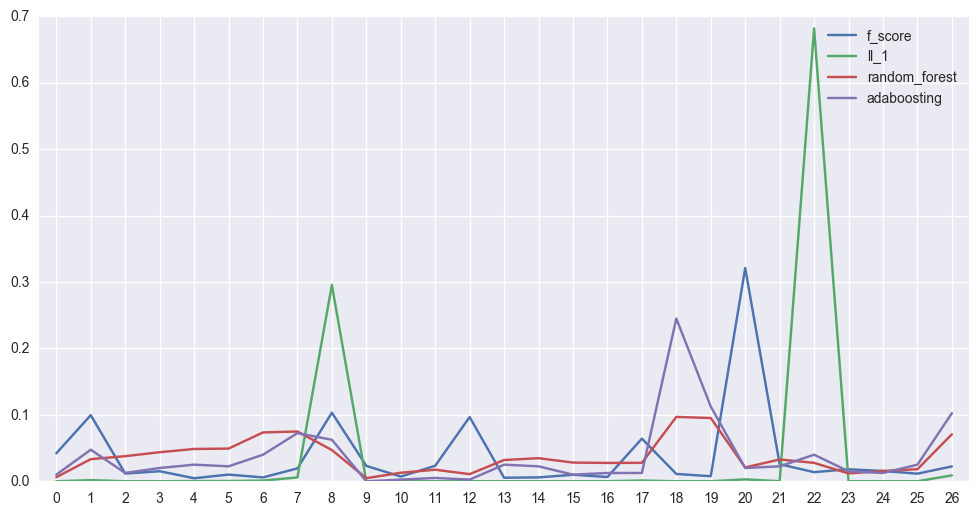

In [85]:
feature_name=list(driver1.columns)
fig=plt.figure(figsize=(12,6))
plt.plot(weight_fed)
plt.plot(weight_lled)
plt.plot(weight_rfed)
plt.plot(weight_adaed)
plt.xlim(-0.5,26.5)
plt.legend(["f_score","ll_1","random_forest","adaboosting"])
plt.xticks(np.arange(27))
plt.show()

In [97]:
print(feature_name[24])

fine_x


important feature:carcolor,accident_minute,is_driver1_province,lng,driver1_age_category,finex

In [98]:
feature_sum=(weight_fed+weight_lled+weight_adaed+weight_rfed)/4

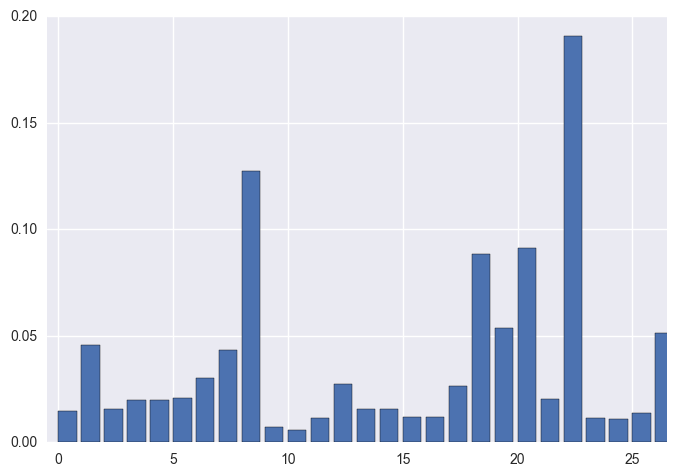

In [101]:
plt.bar(np.arange(27),feature_sum)
plt.xlim(-0.5,26.5)
plt.show()

In [105]:
idx=f_score.feature_ranking(feature_sum)
idx=idx+2

In [110]:
for i in idx:
    print(feature_name[i])

fine_x
accident_minute
driver1_age_category
lng
lat
temperature
carcolor1
accident_hour
accident_day
is_driver1_province
district
accident_weekday
driver1_year_category
jxmc1
accident_month
weather2
weather1
clpp1
sex1
wfxw_x
wind1
wind2
is_driver1_city
score_x
xfcount_x
is_province1
is_city1


In [111]:
id_f=f_score.feature_ranking(weight_f)
id_rf=f_score.feature_ranking(weight_rf)
id_ll=f_score.feature_ranking(weight_ll)
id_ada=f_score.feature_ranking(weight_ada)

In [116]:
idx=[id_f,id_rf,id_ll,id_ada]
for id in idx:
    for i in range(0,10):
        print(feature_name[id[i]+2])
    print("===========")

driver1_age_category
accident_minute
carcolor1
is_driver1_province
district
sex1
driver1_year_category
is_driver1_city
is_province1
temperature
lng
lat
accident_hour
accident_day
temperature
accident_weekday
accident_month
accident_minute
jxmc1
clpp1
fine_x
accident_minute
temperature
accident_hour
driver1_age_category
carcolor1
district
accident_day
accident_weekday
accident_month
lng
lat
temperature
accident_hour
accident_minute
carcolor1
fine_x
accident_day
wfxw_x
accident_month
